In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go

In [2]:
train = pd.read_csv(r'../input/spaceship-titanic/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv(r'../input/spaceship-titanic/test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
sub = pd.read_csv(r'../input/spaceship-titanic/sample_submission.csv')
sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [5]:
print(f'train set have {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'test set have {test.shape[0]} rows and {test.shape[1]} columns.') 
print(f'sample_submission set have {sub.shape[0]} rows and {sub.shape[1]} columns.') 

train set have 8693 rows and 14 columns.
test set have 4277 rows and 13 columns.
sample_submission set have 4277 rows and 2 columns.


In [6]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [8]:
train.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Cabin'],axis=1,inplace=True)

In [9]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8514.0,28.827930,14.489021,0.0,19.0,27.0,38.0,79.0
RoomService,8512.0,224.687617,666.717663,0.0,0.0,0.0,47.0,14327.0
FoodCourt,8510.0,458.077203,1611.489240,0.0,0.0,0.0,76.0,29813.0
ShoppingMall,8485.0,173.729169,604.696458,0.0,0.0,0.0,27.0,23492.0
Spa,8510.0,311.138778,1136.705535,0.0,0.0,0.0,59.0,22408.0
VRDeck,8505.0,304.854791,1145.717189,0.0,0.0,0.0,46.0,24133.0


In [11]:
train['HomePlanet'].replace(np.nan,'missing',inplace=True)
train['CryoSleep'].replace(np.nan,'missing',inplace=True)
train['Destination'].replace(np.nan,'missing',inplace=True)
train['VIP'].replace(np.nan,'missing',inplace=True)

test['HomePlanet'].replace(np.nan,'missing',inplace=True)
test['CryoSleep'].replace(np.nan,'missing',inplace=True)
test['Destination'].replace(np.nan,'missing',inplace=True)
test['VIP'].replace(np.nan,'missing',inplace=True)

In [12]:
train['Age'].mode()

0    24.0
dtype: float64

In [13]:
train['RoomService'].fillna(train['RoomService'].mean(),inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(),inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(),inplace=True)
train['Spa'].fillna(train['Spa'].mean(),inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(),inplace=True)
train['Age'].replace(np.nan,24.0,inplace=True)

test['RoomService'].fillna(test['RoomService'].mean(),inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(),inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(),inplace=True)
test['Spa'].fillna(test['Spa'].mean(),inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(),inplace=True)
test['Age'].replace(np.nan,24.0,inplace=True)

In [14]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## Data visualization:
#### **categorical features:**

In [15]:
fig = go.Figure(data=[go.Pie(labels=train.HomePlanet, hole=.4)])
fig.add_annotation(text='HomePlanet',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['darkorange','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='monospace',
    title=dict(text='HomePlanet',x=0.47,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [16]:
fig = go.Figure(data=[go.Pie(labels=train.CryoSleep, hole=.4)])
fig.add_annotation(text='CryoSleep',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['darkorange','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='monospace',
    title=dict(text='CryoSleep',x=0.47,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [17]:
fig = go.Figure(data=[go.Pie(labels=train.Destination, hole=.4)])
fig.add_annotation(text='Destination',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['darkorange','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='monospace',
    title=dict(text='Destination',x=0.47,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [18]:
fig = go.Figure(data=[go.Pie(labels=train.VIP, hole=.4)])
fig.add_annotation(text='VIP',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')
fig.update_traces(hoverinfo='label+percent+value',
                  marker=dict(colors=['darkorange','blue'], line=dict(color='#000000', width=2)))
fig.update_layout(
    font_family='monospace',
    title=dict(text='VIP',x=0.47,y=0.98,
               font=dict(color='black',size=20)),
    legend=dict(orientation='v',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

#### **numerical features:**

In [19]:
fig = px.histogram(train,x='RoomService',template='plotly_dark',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#FF6692'],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='RoomService feature Distribution',x=0.53,y=0.95),
    xaxis_title_text='RoomService',
    yaxis_title_text='Count',
    bargap=0.3,
)
fig.show()

In [20]:
fig = px.histogram(train,x='FoodCourt',template='plotly_dark',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#FECB52'],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='FoodCourt feature Distribution',x=0.53,y=0.95),
    xaxis_title_text='FoodCourt',
    yaxis_title_text='Count',
    bargap=0.3,
)
fig.show()

In [21]:
fig = px.histogram(train,x='ShoppingMall',template='plotly_dark',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#FF97FF'],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='ShoppingMall feature Distribution',x=0.53,y=0.95),
    xaxis_title_text='ShoppingMall',
    yaxis_title_text='Count',
    bargap=0.3,
)
fig.show()

In [22]:
fig = px.histogram(train,x='Spa',template='plotly_dark',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#636EFA'],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Spa feature Distribution',x=0.53,y=0.95),
    xaxis_title_text='Spa',
    yaxis_title_text='Count',
    bargap=0.3,
)
fig.show()

In [23]:
fig = px.histogram(train,x='VRDeck',template='plotly_dark',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#EF553B'],
                  barmode='group',histfunc='count')

fig.update_layout(
    font_family='monospace',
    title=dict(text='VRDeck feature Distribution',x=0.53,y=0.95),
    xaxis_title_text='VRDeck',
    yaxis_title_text='Count',
    bargap=0.3,
)
fig.show()

### Data pre-processing:

In [24]:
cat = ['HomePlanet','CryoSleep','Destination','VIP']
train[cat] = train[cat].astype(str)
test[cat] = test[cat].astype(str)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    train[i] = le.fit_transform(train[i])
    test[i] = le.transform(test[i])

In [26]:
train['Transported'] = train['Transported'].astype(str)
train['Transported'] = train['Transported'].replace({'False':0,'True':1})

In [27]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


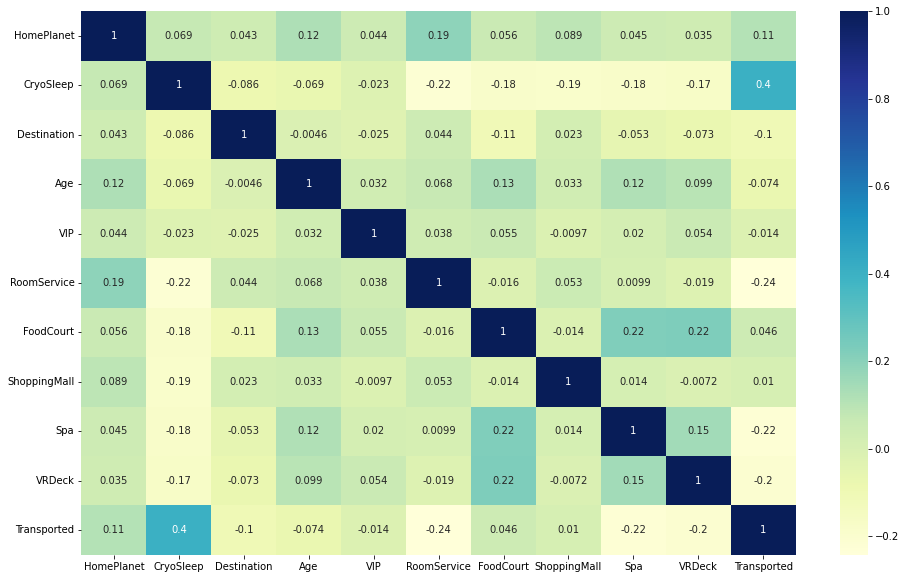

In [28]:
plt.figure(figsize = (16,10))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
y = train['Transported']
train.drop('Transported',axis=1,inplace=True)

In [30]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(folds.split(train)):
    print(f"Fold: {fold}")
    X_train, X_test = train.iloc[trn_idx], train.iloc[val_idx]
    y_train, y_test = y.iloc[trn_idx], y.iloc[val_idx]

    model = LGBMClassifier(n_estimators=1500,learning_rate=0.01)
   
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
                early_stopping_rounds=400,
                verbose=False)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f" accuracy_score: {acc}")
    print("-"*50)

Fold: 0
 accuracy_score: 0.7906843013225991
--------------------------------------------------
Fold: 1
 accuracy_score: 0.7832087406555491
--------------------------------------------------
Fold: 2
 accuracy_score: 0.821161587119034
--------------------------------------------------
Fold: 3
 accuracy_score: 0.8003452243958573
--------------------------------------------------
Fold: 4
 accuracy_score: 0.7894131185270425
--------------------------------------------------


In [31]:
pred = model.predict(test)

In [32]:
sub['Transported'] = pred
sub['Transported'] = sub['Transported'].replace({0:'False',1:'True'})
sub.to_csv(f'cat.csv',index = False)